In [7]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('banklist2.csv',encoding='cp1252')

In [8]:
print("shape", df.shape)

shape (567, 7)


In [9]:
print(df.dtypes)

Bank Name                 object
City                      object
State                     object
Cert                       int64
Acquiring Institution     object
Closing Date              object
Fund                       int64
dtype: object


In [10]:
df.drop('Fund', inplace=True, axis=1)

In [11]:
print(df.dtypes)

Bank Name                 object
City                      object
State                     object
Cert                       int64
Acquiring Institution     object
Closing Date              object
dtype: object


In [12]:
df.drop(df.columns[3], inplace=True, axis=1)

In [13]:
print(df.dtypes)

Bank Name                 object
City                      object
State                     object
Acquiring Institution     object
Closing Date              object
dtype: object


In [14]:
print(df.head(10))


                         Bank Name               City  State   \
0          Heartland Tri-State Bank            Elkhart     KS   
1               First Republic Bank      San Francisco     CA   
2                    Signature Bank           New York     NY   
3               Silicon Valley Bank        Santa Clara     CA   
4                 Almena State Bank             Almena     KS   
5        First City Bank of Florida  Fort Walton Beach     FL   
6              The First State Bank      Barboursville     WV   
7                Ericson State Bank            Ericson     NE   
8  City National Bank of New Jersey             Newark     NJ   
9                     Resolute Bank             Maumee     OH   

                Acquiring Institution  Closing Date   
0               Dream First Bank, N.A.     7/28/2023  
1            JPMorgan Chase Bank, N.A.      5/1/2023  
2                  Flagstar Bank, N.A.     3/12/2023  
3  First–Citizens Bank & Trust Company     3/10/2023  
4        

In [15]:
print(df.columns.tolist())

['Bank Name\xa0', 'City\xa0', 'State\xa0', 'Acquiring Institution\xa0', 'Closing Date\xa0']


In [16]:
df['Closing Date\xa0'] = pd.to_datetime(df['Closing Date\xa0'], format='%m/%d/%Y')

In [17]:
print(df.dtypes)

Bank Name                         object
City                              object
State                             object
Acquiring Institution             object
Closing Date              datetime64[ns]
dtype: object


In [18]:
df = df.dropna(subset=['Closing Date\xa0'])

In [19]:
print("shape", df.shape)

shape (567, 5)


In [20]:
df=df.drop_duplicates(subset='Bank Name\xa0', keep='last')

In [21]:
print("shape", df.shape)

shape (549, 5)


In [22]:
df['Bank Name\xa0'].head(40)

0                              Heartland Tri-State Bank
1                                   First Republic Bank
3                                   Silicon Valley Bank
4                                     Almena State Bank
5                            First City Bank of Florida
7                                    Ericson State Bank
8                      City National Bank of New Jersey
9                                         Resolute Bank
10                                Louisa Community Bank
11                                 The Enloe State Bank
12                  Washington Federal Bank for Savings
13      The Farmers and Merchants State Bank of Argonia
14                                  Fayette County Bank
15    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...
16                                       First NBC Bank
17                                        Proficio Bank
18                        Seaway Bank and Trust Company
19                               Harvest Communi

In [23]:
df['Year'] = df['Closing Date\xa0'].dt.year

In [24]:
print(df.head(10))

                          Bank Name               City  State   \
0           Heartland Tri-State Bank            Elkhart     KS   
1                First Republic Bank      San Francisco     CA   
3                Silicon Valley Bank        Santa Clara     CA   
4                  Almena State Bank             Almena     KS   
5         First City Bank of Florida  Fort Walton Beach     FL   
7                 Ericson State Bank            Ericson     NE   
8   City National Bank of New Jersey             Newark     NJ   
9                      Resolute Bank             Maumee     OH   
10             Louisa Community Bank             Louisa     KY   
11              The Enloe State Bank             Cooper     TX   

                 Acquiring Institution  Closing Date   Year  
0                Dream First Bank, N.A.    2023-07-28  2023  
1             JPMorgan Chase Bank, N.A.    2023-05-01  2023  
3   First–Citizens Bank & Trust Company    2023-03-10  2023  
4                        

In [25]:
print(df.dtypes)

Bank Name                         object
City                              object
State                             object
Acquiring Institution             object
Closing Date              datetime64[ns]
Year                               int64
dtype: object


<Axes: >

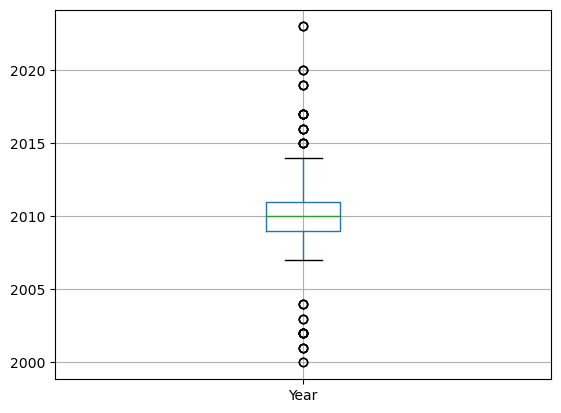

In [26]:
df.boxplot(column=['Year'])

In [27]:
df = df[df['Year'] > 2008]
print("shape", df.shape)
df = df[df['Year'] < 2015]
print("shape", df.shape)
#I have checked for numeric outliers

shape (497, 6)
shape (467, 6)


In [28]:
#end of data cleaning


In [29]:
df['Year'].count()

467

In [30]:
table = pd.pivot_table(df, index = ['Year'], aggfunc='count')
print(table)
#this is the piot tavble for the first sub-question, it is meant to be a simple count of the number of banks closed in each year
#I could not figure out how to limit it to one column and rename it to number of banks closed

      Acquiring Institution   Bank Name   City   Closing Date   State 
Year                                                                  
2009                     137         137    137            137     137
2010                     153         153    153            153     153
2011                      88          88     88             88      88
2012                      49          49     49             49      49
2013                      23          23     23             23      23
2014                      17          17     17             17      17


In [31]:

table = table.reset_index()

In [32]:
print(table.iloc[:, 0])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
Name: Year, dtype: int64


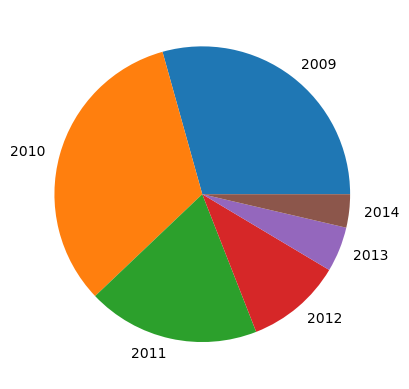

In [33]:
plt.pie(table.iloc[:, 1],
        labels = table.iloc[:, 0])

plt.show()


In [34]:
#according to both the pivot table and the pie chart the three years with the largest amount of closed banks were 2011 with 88
#closed banks, 2009 with 137 closed banks, and 2010 with 153 closed banks. roughly 2008 - 2014 is the most destructive time period
#for the banking industry

In [35]:
table2 = pd.pivot_table(df, index = ['Acquiring Institution\xa0'], aggfunc='count')

print(table2)
#This is the piot table for subquestion 2. 

                               Bank Name   City   Closing Date   State   Year
Acquiring Institution                                                        
1st United Bank                         3      3              3       3     3
Advantage National Bank Group           1      1              1       1     1
Alerus Financial, N.A.                  2      2              2       2     2
Alma Bank                               1      1              1       1     1
AloStar Bank of Commerce                1      1              1       1     1
...                                   ...    ...            ...     ...   ...
Wheaton Bank & Trust                    1      1              1       1     1
Whidbey Island Bank                     2      2              2       2     2
Wilshire State Bank                     1      1              1       1     1
Xenith Bank                             1      1              1       1     1
Your Community Bank                     1      1              1 

In [36]:
table3 = table2.nlargest(10, ['Bank Name\xa0'])
print(table3)
#This is the piot table for subquestion 2.

                                     Bank Name   City   Closing Date   State   \
Acquiring Institution                                                           
No Acquirer                                  26     26             26      26   
State Bank and Trust Company                 12     12             12      12   
Ameris Bank                                  10     10             10      10   
Community & Southern Bank                     8      8              8       8   
U.S. Bank N.A.                                8      8              8       8   
Centennial Bank                               7      7              7       7   
CenterState Bank of Florida, N.A.             6      6              6       6   
Central Bank                                  6      6              6       6   
First-Citizens Bank & Trust Company           6      6              6       6   
Stearns Bank, N.A.                            6      6              6       6   

                           

In [37]:
table3 = table3.reset_index()
print(table3)

                Acquiring Institution   Bank Name   City   Closing Date   \
0                          No Acquirer          26     26             26   
1         State Bank and Trust Company          12     12             12   
2                          Ameris Bank          10     10             10   
3            Community & Southern Bank           8      8              8   
4                       U.S. Bank N.A.           8      8              8   
5                      Centennial Bank           7      7              7   
6    CenterState Bank of Florida, N.A.           6      6              6   
7                         Central Bank           6      6              6   
8  First-Citizens Bank & Trust Company           6      6              6   
9                   Stearns Bank, N.A.           6      6              6   

   State   Year  
0      26    26  
1      12    12  
2      10    10  
3       8     8  
4       8     8  
5       7     7  
6       6     6  
7       6     6  
8

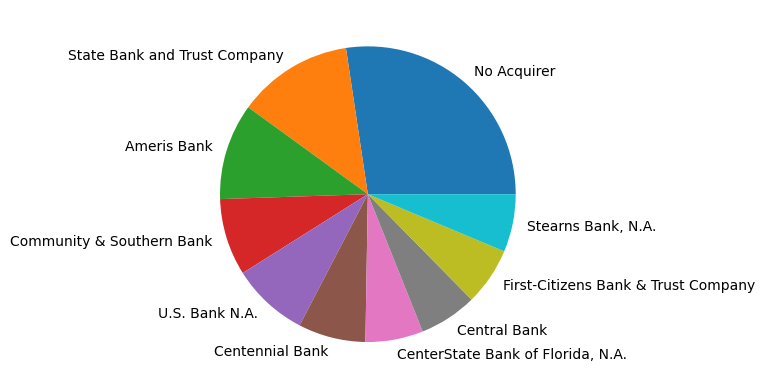

In [38]:
plt.pie(table3.iloc[:, 1],
        labels = table3.iloc[:, 0])

plt.show()

In [39]:
#Accoring to the pivot table and chart we learn thatduring the time period of 2009 - 2014 the largest portions of banks were not acquired by anyone

In [40]:
table4 = pd.pivot_table(df, index = ['State\xa0'], aggfunc='count')
print(table4)

        Acquiring Institution   Bank Name   City   Closing Date   Year
State                                                                 
AL                           7           7      7              7     7
AR                           1           1      1              1     1
AZ                          13          13     13             13    13
CA                          35          35     35             35    35
CO                           9           9      9              9     9
CT                           1           1      1              1     1
FL                          66          66     66             66    66
GA                          79          79     79             79    79
IA                           2           2      2              2     2
ID                           2           2      2              2     2
IL                          58          58     58             58    58
IN                           3           3      3              3     3
KS    

In [43]:
table5 = table4.nlargest(10, ['Bank Name\xa0'])
table5 = table5.reset_index()
print(table5)
#This is the piot table for subquestion 3.

  State   Acquiring Institution   Bank Name   City   Closing Date   Year
0     GA                      79          79     79             79    79
1     FL                      66          66     66             66    66
2     IL                      58          58     58             58    58
3     CA                      35          35     35             35    35
4     MN                      22          22     22             22    22
5     WA                      17          17     17             17    17
6     MO                      14          14     14             14    14
7     AZ                      13          13     13             13    13
8     MI                      12          12     12             12    12
9     MD                      10          10     10             10    10


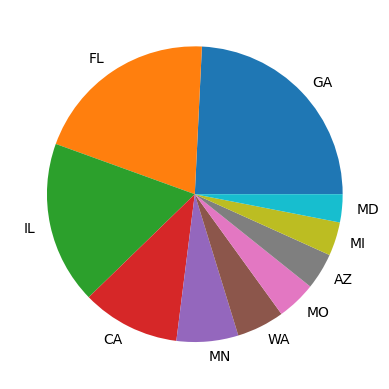

In [44]:
plt.pie(table5.iloc[:, 1],
        labels = table5.iloc[:, 0])

plt.show()

In [45]:
#Among the top 10 states that had bank closures from 2009-2014 Flordia ,georgia and Illinois were the three that had the most bank closures

In [46]:
#Throughout this projet I have learned that from 2008-2014 was the most destructive time period for the banking industry according the number of closed banks
#In addition I have learned which speific banks were benfitting from the closures during that time period by looking at who was acquring the most amount of these failed banks
#I have also learned which states were fropm the most difficulty by looking at which states had the most closed banks